In [1]:
 # Importing the relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the dataset:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataset:
leads.shape

(9240, 37)

In [4]:
# Taking a look at the datatypes for the various columns:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

From the above output, we can see that there are a lot of categorical variables in the dataset and therefore it is prudent to have a look at their categories.<br>

In [5]:
# Selecting all the categorical variables:
leads.select_dtypes('object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Levels in all the categorical variables:

for i in ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']:
    print(i)
    print(leads[i].value_counts(normalize=True))
    print('\n')

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
NC_EDM               0.000109
WeLearn              0.000109
Pay per Click Ads    0.000109
blog                 0.000109
youtubechannel       0.000109
welearnblog_Home     0.000109
testone              0.000109
Name: Lead Source, dtype: float64


Do Not Email
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64


Do Not Call


As is mentioned in the problem statement, some of the columns in the dataset contain a category called 'Select' which is to be considered as a missing value since it is chosen by default by the system in case of no input from the user.<br>
We can see 4 variables falling in that category which are as follows:<br>
- Specialization
- How did you hear about X education
- Lead Profile
- City
These values must be converted to Nan before continuing with the analysis. 

##### Converting Select to Null Values:

In [7]:
# Specialization:
leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [8]:
# How did you hear about X education:
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [9]:
# Lead Profile:
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
# City:
leads['City'] = leads['City'].replace('Select', np.nan)
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Now that we have a workable dataset, let us move on with the null value analysis.
## Null Value Analysis:

In [11]:
# Getting the percentage of null values for all the columns:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

It can be seen that there are a couple of variables with more than 70% of their data missing and therefore it is safe to drop them since they do not provide us with enough information.

In [12]:
# Dropping columns with more than 70% of the data:
leads.drop('How did you hear about X Education', axis='columns', inplace=True)
leads.drop('Lead Profile', axis='columns', inplace = True)
leads.shape

(9240, 35)

It can be seen that the next column  with the highest percentage of missing values is **Lead Quality** (51%). Imputing half of the data does not make sense since valuable information might be lost. Also there is a high risk of contaminating the data.<br>
Let us drop this column all together.

In [13]:
# Dropping Lead Quality:
leads.drop('Lead Quality', axis='columns', inplace=True)
leads.shape

(9240, 34)

In [14]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time

The following 4 columns have more than 45% null values.
- Asymmetrique Profile Score (numeric)
- Asymmetrique Activity Score (numeric)
- Asymmetrique Profile Index (categorical)
- Asymmetrique Activity Index (categorical)

These columns are important in the sense that they contain the score and index for the prospective customer and therefore cannot be dropped.<br>
Let us drop the rows corresponding to the null values.

**Asymmetrique Activity Score**

In [15]:
# Asymmetrique Activity Score:

# Dropping the rows with missing values:

leads = leads[~leads['Asymmetrique Activity Score'].isnull()]
leads.shape

(5022, 34)

In [16]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

City                                             39.90
Specialization                                   37.32
Tags                                             35.03
What matters most to you in choosing a course    28.75
What is your current occupation                  28.67
Country                                          25.67
Page Views Per Visit                              1.73
TotalVisits                                       1.73
Last Activity                                     1.19
Lead Source                                       0.38
Converted                                         0.00
Search                                            0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Last Notable Activity                             0.00
Magazine  

We can see that all the rows corresponding to the Asymmetrique Activity/Profile Index and Score have been dropped.<br>
Let us proceed further with the next column **City**

In [17]:
# We can see that City has aboout 40% null values. Let us look at the data to get a better understanding.
leads['City'].value_counts(normalize=True)

Mumbai                         0.579523
Thane & Outskirts              0.137508
Other Cities                   0.125580
Other Cities of Maharashtra    0.083499
Other Metro Cities             0.062293
Tier II Cities                 0.011597
Name: City, dtype: float64

From the above output, it is clear that the State of Maharashtra alone accounts for about 80% of the data. Therefore this column feels like a column with redundant values which will not provide the model with any information and therefore it is safe to drop it altogether.

In [18]:
# Dropping the City column since it contains redundant values:
leads.drop('City', axis='columns', inplace=True)
leads.shape

(5022, 33)

Let us move forward with the next column **Specialization** to treat the missing values.<br>
This column has around 37% of its data missing.

In [19]:
# Resetting the index:
leads = leads.reset_index(drop=True)

In [20]:
# Taking a look at the distribution:
leads['Specialization'].value_counts(normalize=True)

Finance Management                   0.159466
Human Resource Management            0.144854
Marketing Management                 0.139136
Operations Management                0.085769
Business Administration              0.073380
Supply Chain Management              0.067027
IT Projects Management               0.062897
Banking, Investment And Insurance    0.060673
Travel and Tourism                   0.032719
Media and Advertising                0.031766
International Business               0.028590
Healthcare Management                0.025731
E-COMMERCE                           0.019060
Hospitality Management               0.018742
Retail Management                    0.016836
Rural and Agribusiness               0.013342
E-Business                           0.010801
Services Excellence                  0.009212
Name: Specialization, dtype: float64

As we can see there are a great deal of categories for this column and it seems that they can be grouped into some broader categories to make the data a little more readable.<br>
We can group them into the following buckets:<br>
**Finance**:
- Finance Management
- banking investment and insurance<br>

**Human Resources**<br>

**Marketing**:
- Marketing Mgmt
- Media and Advertising<br>

**Business Administration**:
- Business administration
- International Business
- E-business<br>

**Information Technology**:
- IT Projects Management
- Servies Excellence
- E-Commerce<br>

**Operations Management**:
- Operations Management
- Supply chain management
- Retail Management
- Rural and Agribusiness<br>

**Tourism and Healthcare**:
- Travel and Tourism
- Healthcare
- Hospitality

In [21]:
# Puttinng the categories into buckets:

# Finance:
leads['Specialization'] = leads['Specialization'].replace('Finance Management', 'Finance')
leads['Specialization'] = leads['Specialization'].replace('Banking, Investment And Insurance', 'Finance')

# Marketing:
leads['Specialization'] = leads['Specialization'].replace('Marketing Management', 'Marketing')
leads['Specialization'] = leads['Specialization'].replace('Media and Advertising', 'Marketing')

# Business Administration:
leads['Specialization'] = leads['Specialization'].replace('International Business', 'Business Administration')
leads['Specialization'] = leads['Specialization'].replace('E-Business', 'Business Administration')

# Information Technology:
leads['Specialization'] = leads['Specialization'].replace('IT Projects Management', 'Information Technology')
leads['Specialization'] = leads['Specialization'].replace('Services Excellence', 'Information Technology')
leads['Specialization'] = leads['Specialization'].replace('E-COMMERCE', 'Information Technology')

# Operations Management:
leads['Specialization'] = leads['Specialization'].replace('Supply Chain Management', 'Operations Management')
leads['Specialization'] = leads['Specialization'].replace('Retail Management', 'Operations Management')
leads['Specialization'] = leads['Specialization'].replace('Rural and Agribusiness', 'Operations Management')

# Tourism and Healthcare:
leads['Specialization'] = leads['Specialization'].replace('Travel and Tourism', 'Tourism and Healthcare')
leads['Specialization'] = leads['Specialization'].replace('Healthcare Management', 'Tourism and Healthcare')
leads['Specialization'] = leads['Specialization'].replace('Hospitality Management', 'Tourism and Healthcare')

In [22]:
# Taking a look at the distribution:
leads['Specialization'].value_counts(normalize=True)

Finance                      0.220140
Operations Management        0.182973
Marketing                    0.170902
Human Resource Management    0.144854
Business Administration      0.112770
Information Technology       0.091169
Tourism and Healthcare       0.077192
Name: Specialization, dtype: float64

Since this column has 36% missing values, let us try to impute the same using the distribution as given above.

In [23]:
# Imputing the values:
orig_features = pd.DataFrame(leads['Specialization'].value_counts(normalize=True))
orig_features = orig_features.reset_index()

orig_vars = list(orig_features['index'])
orig_dist = list(orig_features['Specialization'])

# Imputation:
leads['Specialization'].fillna(pd.Series(np.random.choice(orig_vars,
                                                          p=orig_dist,
                                                          size = len(leads))),
                               inplace = True)

# Looking at the distribution again:
leads['Specialization'].value_counts(normalize=True, dropna=False)

Finance                      0.219434
Operations Management        0.185185
Marketing                    0.171645
Human Resource Management    0.143170
Business Administration      0.114297
Information Technology       0.089805
Tourism and Healthcare       0.076464
Name: Specialization, dtype: float64

In [24]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

Tags                                             35.03
What matters most to you in choosing a course    28.75
What is your current occupation                  28.67
Country                                          25.67
Page Views Per Visit                              1.73
TotalVisits                                       1.73
Last Activity                                     1.19
Lead Source                                       0.38
Do Not Call                                       0.00
Converted                                         0.00
Search                                            0.00
Do Not Email                                      0.00
Total Time Spent on Website                       0.00
Lead Origin                                       0.00
Specialization                                    0.00
Lead Number                                       0.00
Last Notable Activity                             0.00
Magazine                                          0.00
A free cop

The next column with the highest % of missing values is **Tags**:

In [25]:
# Looking at the distribution:
leads['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.346001
Ringing                                              0.193074
Interested in other courses                          0.106957
Already a student                                    0.071100
Closed by Horizzon                                   0.065890
switched off                                         0.038615
Lost to EINS                                         0.032179
Busy                                                 0.028808
Not doing further education                          0.025130
Interested  in full time MBA                         0.022372
Graduation in progress                               0.020227
invalid number                                       0.012872
Diploma holder (Not Eligible)                        0.007968
wrong number given                                   0.007662
opp hangup                                           0.006436
number not provided                                  0.004903
in touch

A broad grouping of the Tags can be done as follows:

**Interested**:<br>
- Will revert after reading the email
- Interested in other courses
- Interested in Next batch 
- Shall take in the next coming month
- in touch with EINS
- Lateral student
- Closed by Horizzon

**Lost**:<br>
- Lost to Others
- wrong number given
- number not provided
- invalid number
- Lost to EINS


**Work in Progress**:<br>
- Ringing
- switched off
- busy
- Graduation in progress
- Want to take admission but has financial problems
- Still Thinking
- In confusion whether part time or DLP


**Not interested**:<br>
- Not doing further education
- Interested  in full time MBA
- opp hangup
- Already a student

**Not eligible**:<br>
- Diploma holder (Not Eligible)
- University not recognized
- Recognition issue (DEC approval)

In [26]:
# Interested:
leads['Tags'] = leads['Tags'].replace('Will revert after reading the email', 'Interested')
leads['Tags'] = leads['Tags'].replace('Interested in other courses', 'Interested')
leads['Tags'] = leads['Tags'].replace('Interested in Next batch', 'Interested')
leads['Tags'] = leads['Tags'].replace('Shall take in the next coming month', 'Interested')
leads['Tags'] = leads['Tags'].replace('in touch with EINS', 'Interested')
leads['Tags'] = leads['Tags'].replace('Lateral student', 'Interested')
leads['Tags'] = leads['Tags'].replace('Closed by Horizzon', 'Interested')
leads['Tags'] = leads['Tags'].replace('Lost to Others', 'Interested')
leads['Tags'] = leads['Tags'].replace('Lost to EINS', 'Interested')

# Work in Progress:
leads['Tags'] = leads['Tags'].replace('Ringing', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('switched off', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('Busy', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('Graduation in progress', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('Want to take admission but has financial problems', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('Still Thinking', 'Work in Progress')
leads['Tags'] = leads['Tags'].replace('In confusion whether part time or DLP', 'Work in Progress')

# Not Interested:
leads['Tags'] = leads['Tags'].replace('Not doing further education', 'Not Interested')
leads['Tags'] = leads['Tags'].replace('Interested  in full time MBA', 'Not Interested')
leads['Tags'] = leads['Tags'].replace('opp hangup', 'Not Interested')
leads['Tags'] = leads['Tags'].replace('Already a student', 'Not Interested')

# Not Eligible:
leads['Tags'] = leads['Tags'].replace('Diploma holder (Not Eligible)', 'Not Eligible')
leads['Tags'] = leads['Tags'].replace('University not recognized', 'Not Eligible')
leads['Tags'] = leads['Tags'].replace('Recognition issue (DEC approval)', 'Not Eligible')

# Lost:
leads['Tags'] = leads['Tags'].replace('wrong number given', 'Lost')
leads['Tags'] = leads['Tags'].replace('number not provided', 'Lost')
leads['Tags'] = leads['Tags'].replace('invalid number', 'Lost')

In [27]:
# New Tags:
leads['Tags'].value_counts(normalize=True, dropna=False)

Interested          0.361410
NaN                 0.350259
Work in Progress    0.184986
Not Interested      0.081243
Lost                0.016527
Not Eligible        0.005575
Name: Tags, dtype: float64

Let us impute the values for **Tag**:

In [28]:
# Imputing the values:
orig_features = pd.DataFrame(leads['Tags'].value_counts(normalize=True))
orig_features = orig_features.reset_index()

orig_vars = orig_features['index']
orig_dist = orig_features['Tags']

# Imputation:
leads['Tags'] = leads['Tags'].fillna(pd.Series(np.random.choice(orig_vars,
                                                                p=orig_dist,
                                                                size = len(leads))))

leads['Tags'].value_counts(normalize=True, dropna=False)

Interested          0.555954
Work in Progress    0.283154
Not Interested      0.122262
Lost                0.029271
Not Eligible        0.009359
Name: Tags, dtype: float64

In [29]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

What matters most to you in choosing a course    28.75
What is your current occupation                  28.67
Country                                          25.67
TotalVisits                                       1.73
Page Views Per Visit                              1.73
Last Activity                                     1.19
Lead Source                                       0.38
Last Notable Activity                             0.00
Search                                            0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
Newspaper 

Let us proceed with the next column **What matter most to you in choosing a course**.<br>
As we can see, this column contains about 29% null values. Let us look at the distribution for it.

In [30]:
# Looking at the distribution:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999441
Flexibility & Convenience    0.000279
Other                        0.000279
Name: What matters most to you in choosing a course, dtype: float64

As we can see that around 99% of the non-null values fall in the category **Better Career prospects** and therefore this column will not provide the model with any information.<br>
Let us drop this column.

In [31]:
leads.drop('What matters most to you in choosing a course', axis='columns', inplace=True)
leads.shape

(5022, 32)

Let us move on with the next column **What is your current occupation**.

In [32]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.859296
Working Professional    0.109715
Student                 0.027080
Businessman             0.001675
Other                   0.001396
Housewife               0.000838
Name: What is your current occupation, dtype: float64

Again we can see that the data is heavily skewed and lacks information since most of the non-null values fall in one category. Here we have 86% values in the 'Unemployed' category.<br>
Let us drop this column.

In [33]:
leads.drop('What is your current occupation', axis='columns', inplace=True)
leads.shape

(5022, 31)

**Country**

In [34]:
leads['Country'].value_counts(normalize=True)

India                   0.955532
United States           0.011787
United Arab Emirates    0.006965
Singapore               0.004286
Saudi Arabia            0.002947
Australia               0.001875
Hong Kong               0.001607
Bahrain                 0.001339
United Kingdom          0.001339
France                  0.001072
Qatar                   0.001072
Kuwait                  0.001072
South Africa            0.000804
Canada                  0.000804
Germany                 0.000536
unknown                 0.000536
Ghana                   0.000536
China                   0.000536
Philippines             0.000536
Nigeria                 0.000536
Oman                    0.000536
Sweden                  0.000536
Bangladesh              0.000536
Italy                   0.000268
Switzerland             0.000268
Indonesia               0.000268
Belgium                 0.000268
Denmark                 0.000268
Asia/Pacific Region     0.000268
Sri Lanka               0.000268
Netherland

Again we see that 95% of the data is for **India** and therefore the column can be dropped since it does not contain enough information.

In [35]:
# Dropping the country column:
leads.drop('Country', axis='columns', inplace=True)
leads.shape

(5022, 30)

In [36]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

TotalVisits                                 1.73
Page Views Per Visit                        1.73
Last Activity                               1.19
Lead Source                                 0.38
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

Now we have a very small number of missing values in a very few columns and therefore we can simply drop these rows and carry forward with our analysis.

**TotalVisits**

In [37]:
leads = leads[~leads['TotalVisits'].isnull()]
leads.shape

(4935, 30)

In [38]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

Lead Source                                 0.28
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

**Lead Source**

In [39]:
leads = leads[~leads['Lead Source'].isnull()]
leads.shape

(4921, 30)

In [40]:
# Getting the % Null Values:
round(leads.isnull().sum(axis='rows')/leads.shape[0] * 100, 2).sort_values(ascending = False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

Now that we have a complete dataframe, let us proceed with the creation of the dummy variables.

# Analysing the categories for dummy variables:

In [41]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# Levels in all the categorical variables:

for i in ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']:
    print(i)
    print(leads[i].value_counts(normalize=True))
    print('\n')

Lead Origin
Landing Page Submission    0.522658
API                        0.412518
Lead Add Form              0.058728
Lead Import                0.006096
Name: Lead Origin, dtype: float64


Lead Source
Google               0.333875
Direct Traffic       0.259297
Olark Chat           0.186954
Organic Search       0.128429
Reference            0.044097
Referral Sites       0.024182
Welingak Website     0.013412
Facebook             0.006096
google               0.001016
Press_Release        0.000406
Social Media         0.000406
Live Chat            0.000406
Click2call           0.000406
bing                 0.000203
Pay per Click Ads    0.000203
NC_EDM               0.000203
blog                 0.000203
WeLearn              0.000203
Name: Lead Source, dtype: float64


Do Not Email
No     0.929486
Yes    0.070514
Name: Do Not Email, dtype: float64


Do Not Call
No     0.999594
Yes    0.000406
Name: Do Not Call, dtype: float64


Converted
0    0.625889
1    0.374111
Name: Converted, dty

As can be seen above, there are some variables which have redundant values. The following is  a list of those columns:
- **Do Not Email** and **Do Not Call** have more than 90% of the data in one category.
- The columns **Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content** and **I agree to pay the amount through cheque** also have the same issue of redundancy.

In [43]:
# Dropping the above mentioned columns:
cols_to_drop = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
                'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque']

# Dropping the columns:
leads.drop(cols_to_drop, axis='columns', inplace=True)
leads.shape

(4921, 17)

In [44]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Tourism and Healthcare,Interested,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance,Work in Progress,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Interested,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Marketing,Work in Progress,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Marketing,Interested,02.Medium,01.High,15.0,18.0,No,Modified


### Exploratory Data Analysis:
Now that we have a clean dataframe, let us proceed with EDA to get an idea of the distribution of the data.

In [45]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# Lead Origin:
temp = pd.DataFrame(leads['Converted'].groupby(leads['Lead Origin']).sum()).reset_index().sort_values('Converted',
                                                                                                     ascending=False)
temp

,Lead Origin,Converted
1,Landing Page Submission,936
0,API,634
2,Lead Add Form,262
3,Lead Import,9


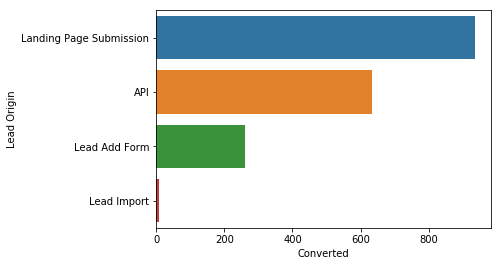

In [47]:
sns.barplot(y='Lead Origin', x='Converted', data=temp)

We can see that the highest number of lead conversions happen for people who have landed on the submission page followed by the API and Lead Add Form. Lead Import accounts for the least number of conversions.

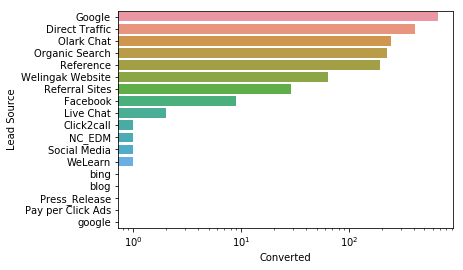

In [48]:
# Lead Source:
temp = leads['Converted'].groupby(leads['Lead Source']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Lead Source', x='Converted', data =temp)
plt.xscale('log')

We can see that **Google** has come twice in the dataset and therefore we need to correct it.

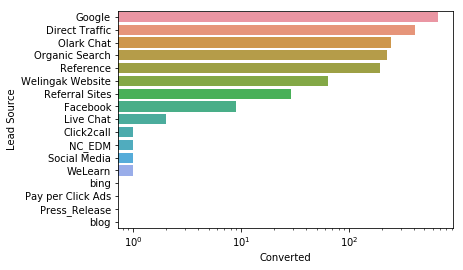

In [49]:
# Replacing 'google' with 'Google':
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

# Running the analysis again:
temp = leads['Converted'].groupby(leads['Lead Source']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Lead Source', x='Converted', data =temp)
plt.xscale('log')

As expected, **Google** accounts for the highest % of leads conversion, After which we have **Direct Traffic**. <br>
**Olark Chat**, **Organic Search** and **Reference** have more or less the same value of conversions.<br>
**Bing**, **Pay per Click ads** and **blogs** account for 0 conversions as the Lead Source.

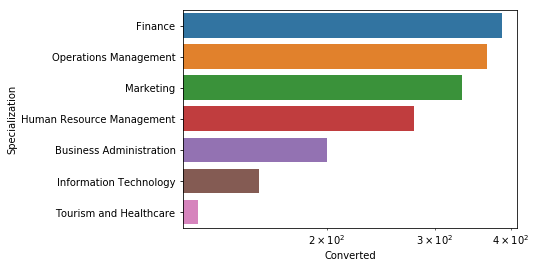

In [50]:
# Specialization:
temp = leads['Converted'].groupby(leads['Specialization']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Specialization', x='Converted', data =temp)
plt.xscale('log')

We can see that students specializing in **Finance**, **Operations Management** and **Marketing** are most likely to be converted into paying customers.<br>
**Tourism and Healthcare** and **Information Technology** account for the least lead conversions.

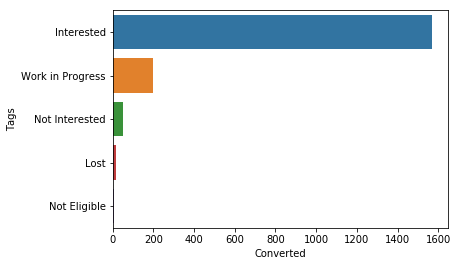

In [51]:
# Specialization:
temp = leads['Converted'].groupby(leads['Tags']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Tags', x='Converted', data =temp)

The tags give a clear picture of what is expected. The highest number of conversions come from the **Interested*** Category and the lowest from the **Lost** and **Not Eligible** Category.

In [52]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

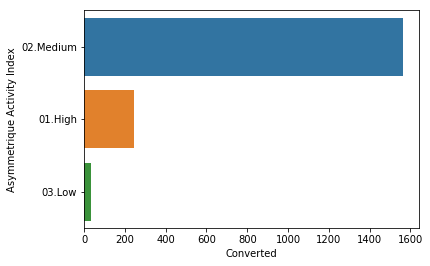

In [53]:
# Asymmetrique Activity Index:
temp = leads['Converted'].groupby(leads['Asymmetrique Activity Index']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Asymmetrique Activity Index', x='Converted', data =temp)

A curious thing pops out from the above plot.<br>
People with  a **higher** degree of activity are actually less likely to be converted. This could happen because these people are a bit skeptical while opting to pay for the course and therefore the lead conversion factor takes a hit.<br>
On the contrary, people with a **Medium** level of activity are the most likely to end up to buying the course.

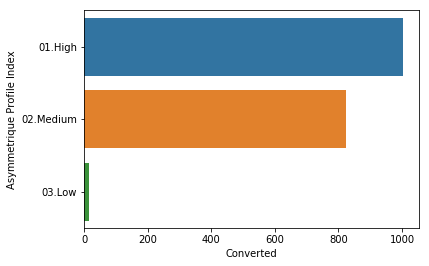

In [54]:
# Asymmetrique Profile Index
temp = leads['Converted'].groupby(leads['Asymmetrique Profile Index']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='Asymmetrique Profile Index', x='Converted', data =temp)

It can be seen that there is not much difference between the profiles rated **high** and the profiles rated **Medium** and therfore these both categories are more likely to end up buying the course.

In [55]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

(0, 30)

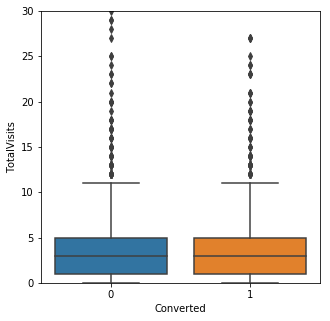

In [56]:
# Total Visits:
plt.figure(figsize=(5,5))
sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.ylim([0, 30])

It is interesting to note that the total visits made by the customer does not have any affect on the conversion rate since the number of conversions remain the same.<br>
However, people who are less likely to convert have more outliers i.e they visit the site a great number of times. This can be explained by the skepticism of the customer about the platform.

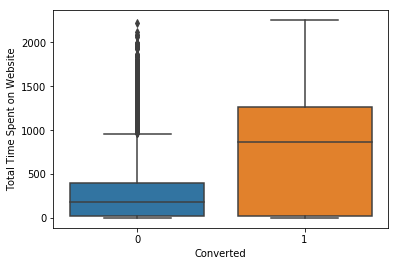

In [57]:
# Total Time Spent on Website
#plt.figure(figsize=(6,6))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)

It can be seen that the customers who are the most likely to convert/buy the courses on the platform spend a significant amount of time on the website.<br>
This can be explained by their interest in the courses offered and what they get to learn from it.

In [58]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

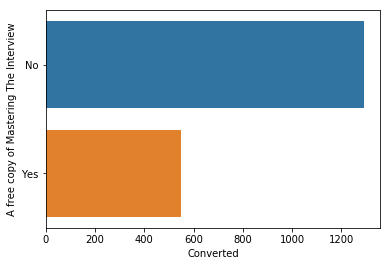

In [59]:
# A free copy of Mastering The Interview
temp = leads['Converted'].groupby(leads['A free copy of Mastering The Interview']).sum().reset_index().sort_values('Converted',
                                                                                       ascending=False)
sns.barplot(y='A free copy of Mastering The Interview', x='Converted', data =temp)

This is yet another weird thing to notice that the people who enrolled in the course did not ask for the copy of the magazine, whereas the people who didn't enroll in the course were more likely to ask for freebies.<br>
This can be yet another distinguishing factor.

Now that we have a general feel of the data, let us proceed with the creation of dummy variables.
# Creating Dummy Variables

In [60]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Creating binary variables

In [61]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})
print(leads['A free copy of Mastering The Interview'].value_counts())

0    3385
1    1536
Name: A free copy of Mastering The Interview, dtype: int64


# Creating Dummy Variables

In [62]:
lead_origin_dmy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'Tags',
                                        'Asymmetrique Activity Index','Asymmetrique Profile Index',
                                        'Last Notable Activity']],drop_first=True)
lead_origin_dmy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
# Concatenating with the original dataframe:

leads = pd.concat([leads, lead_origin_dmy], axis = 1)

# Dropping the original column:
leads.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'Tags',
            'Asymmetrique Activity Index','Asymmetrique Profile Index',
            'Last Notable Activity'], axis='columns', inplace=True)

leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,15.0,15.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,15.0,15.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,14.0,20.0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,13.0,17.0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,15.0,18.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [64]:
leads.shape

(4921, 69)

In [65]:
# Resetting the index:
leads = leads.reset_index(drop=True)

## Checking for Outliers

In [66]:
num_leads = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
                       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [67]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
                       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,3.564926,491.016054,2.408069,14.314977,16.337330
std,4.201033,547.477817,2.212106,1.396554,1.804918
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,19.000000,1.000000,14.000000,15.000000
50%,3.000000,255.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.330000,15.000000,18.000000
90%,8.000000,1377.000000,5.000000,16.000000,19.000000
95%,10.000000,1565.000000,6.000000,17.000000,20.000000
99%,18.000000,1845.800000,9.000000,17.000000,20.000000


We see outliers in the data for the columns 'TotalVisits','Total Time Spent on Website'and'Page Views Per Visit' as there are few maximum values 

In [68]:
leads = leads.rename(columns={'TotalVisits':'Total_Visits','Total Time Spent on Website':'Total_Time_Spent_on_Website',
                                     'Page Views Per Visit':'Page_Views_Per_Visit','Asymmetrique Activity Score':'Asymmetrique_Activity_Score'
                                     ,'Asymmetrique Profile Score':'Asymmetrique_Profile_Score'})

In [69]:
# removing (statistical) outliers
Q1 = leads.Total_Visits.quantile(0.25)
Q3 = leads.Total_Visits.quantile(0.70)
IQR = Q3 - Q1
leads = leads[(leads.Total_Visits >= Q1 - 1.5*IQR) & (leads.Total_Visits <= Q3 + 1.5*IQR)]

Q1 = leads.Total_Time_Spent_on_Website.quantile(0.25)
Q3 = leads.Total_Time_Spent_on_Website.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.Total_Time_Spent_on_Website >= Q1 - 1.5*IQR) & (leads.Total_Time_Spent_on_Website <= Q3 + 1.5*IQR)]

Q1 = leads.Page_Views_Per_Visit.quantile(0.25)
Q3 = leads.Page_Views_Per_Visit.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.Page_Views_Per_Visit >= Q1 - 1.5*IQR) & (leads.Page_Views_Per_Visit <= Q3 + 1.5*IQR)]

Q1 = leads.Asymmetrique_Activity_Score.quantile(0.25)
Q3 = leads.Asymmetrique_Activity_Score.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.Asymmetrique_Activity_Score >= Q1 - 1.5*IQR) & 
                      (leads.Asymmetrique_Activity_Score <= Q3 + 1.5*IQR)]

Q1 = leads.Asymmetrique_Profile_Score.quantile(0.25)
Q3 = leads.Asymmetrique_Profile_Score.quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads.Asymmetrique_Profile_Score >= Q1 - 1.5*IQR) & 
                      (leads.Asymmetrique_Profile_Score <= Q3 + 1.5*IQR)]

In [70]:
leads[['Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
                       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
count,3770.00000,3770.000000,3770.000000,3770.000000,3770.000000
mean,2.80000,511.189125,2.179345,14.319629,16.425199
std,2.09658,551.522511,1.614792,0.886778,1.809398
min,0.00000,0.000000,0.000000,13.000000,11.000000
25%,1.00000,32.000000,1.000000,14.000000,15.000000
50%,3.00000,275.000000,2.000000,14.000000,16.000000
75%,4.00000,976.000000,3.000000,15.000000,18.000000
90%,6.00000,1388.100000,4.000000,16.000000,19.000000
95%,6.00000,1565.550000,5.000000,16.000000,20.000000
99%,8.00000,1840.310000,6.000000,16.000000,20.000000


In [71]:
leads.shape

(3770, 69)

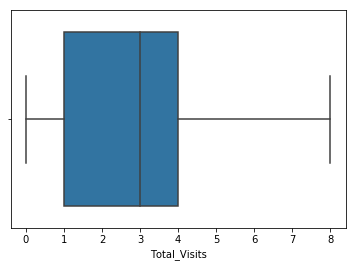

In [72]:
# Total Visits:
sns.boxplot(leads['Total_Visits'])

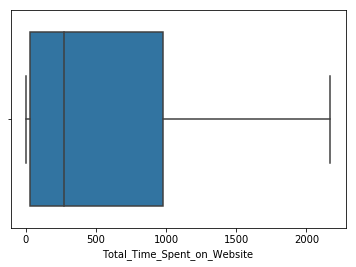

In [73]:
# Total_Time_Spent_on_Website:
sns.boxplot(leads['Total_Time_Spent_on_Website'])

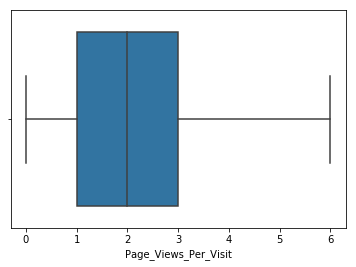

In [74]:
# Page_Views_Per_Visit
sns.boxplot(leads['Page_Views_Per_Visit'])

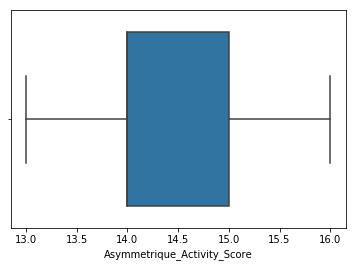

In [75]:
# Asymmetrique_Activity_Score
sns.boxplot(leads['Asymmetrique_Activity_Score'])

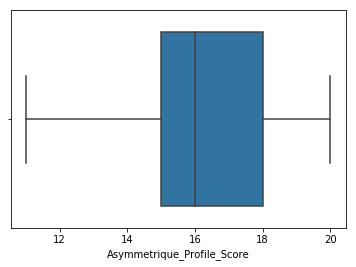

In [76]:
# Asymmetrique_Profile_Score
sns.boxplot(leads['Asymmetrique_Profile_Score'])

#### We now see no outliers in the data

In [77]:
leads.shape

(3770, 69)

In [78]:
leads.head()

,Prospect ID,Lead Number,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,15.0,15.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,15.0,15.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,14.0,20.0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,13.0,17.0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,15.0,18.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [79]:
leads.reset_index(drop=True)

,Prospect ID,Lead Number,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.00,15.0,15.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.50,15.0,15.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.00,14.0,20.0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.00,13.0,17.0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.00,15.0,18.0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,2.0,1640,2.00,14.0,20.0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,0,0.0,0,0.00,15.0,15.0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,2.0,71,2.00,14.0,14.0,1,1,...,0,1,0,0,0,0,0,0,0,0
8,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,4.0,58,4.00,13.0,16.0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,1,8.0,1343,2.67,14.0,17.0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [80]:
leads.shape

(3770, 69)

### Step 5: Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

leads[['Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
                       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']] = scaler.fit_transform(leads[['Total_Visits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
                       'Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score']])

leads.head()

,Prospect ID,Lead Number,Converted,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,-1.335685,-0.926992,-1.349793,0.767342,-0.787769,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,1.049467,0.295242,0.198600,0.767342,-0.787769,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,-0.381624,1.851142,-0.111078,-0.360486,1.975948,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,-0.858655,-0.373904,-0.730436,-1.488314,0.317717,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,-0.381624,1.662548,-0.730436,0.767342,0.870461,0,1,...,0,0,0,0,1,0,0,0,0,0


In [83]:
leads.shape

(3770, 69)

# Model Building

### Step 4: Test-Train Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,-1.335685,-0.926992,-1.349793,0.767342,-0.787769,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.049467,0.295242,0.198600,0.767342,-0.787769,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.381624,1.851142,-0.111078,-0.360486,1.975948,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,-0.858655,-0.373904,-0.730436,-1.488314,0.317717,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,-0.381624,1.662548,-0.730436,0.767342,0.870461,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
y_model = leads[['Prospect ID','Lead Number','Converted']]

y=y_model['Converted']

In [87]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train_model, y_test_model = train_test_split(X, y_model, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
X_train.shape

(2639, 66)

In [90]:
y_train=y_train_model['Converted']

In [91]:
y_train.shape

(2639,)

In [92]:
X_test.shape

(1131, 66)

In [93]:
y_test=y_test_model['Converted']

In [94]:
y_test.shape

(1131,)

### Checking the Conversion Rate

In [95]:
convert = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convert

42.360742705570296

Percentage conversion of a lead is 42.36%

### Performing PCA

In [96]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [97]:
# Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [98]:
pca.components_

array([[ 5.42304860e-01,  3.65597501e-01,  5.51200342e-01, ...,
         9.61978202e-03,  6.60119174e-04,  1.85425724e-03],
       [ 2.56809208e-01,  1.40971731e-01,  2.39192962e-01, ...,
        -1.95270396e-02,  3.56664375e-04,  1.32879478e-03],
       [ 5.39908024e-02,  4.26647375e-01,  1.68795119e-02, ...,
         2.26271543e-02,  3.68129838e-03, -1.36302806e-03],
       ...,
       [ 0.00000000e+00,  1.97684166e-17,  2.34604642e-17, ...,
        -3.33066907e-16,  3.46944695e-17, -3.13984949e-16],
       [-0.00000000e+00, -2.83768890e-17, -9.47787061e-17, ...,
        -1.66533454e-16,  6.76542156e-17,  1.52655666e-16],
       [ 0.00000000e+00, -2.60208521e-18, -1.53687345e-17, ...,
        -2.15105711e-16, -2.42861287e-16,  1.17961196e-16]])

In [99]:
pca.explained_variance_ratio_

array([2.70068094e-01, 1.24493178e-01, 1.13431143e-01, 7.86034267e-02,
       6.34950583e-02, 4.94033564e-02, 4.01408673e-02, 2.41480259e-02,
       2.28225698e-02, 2.12043655e-02, 2.05858316e-02, 1.93280554e-02,
       1.62983036e-02, 1.37162127e-02, 1.15104636e-02, 1.07840518e-02,
       9.95418426e-03, 9.14661840e-03, 8.19167012e-03, 7.92558343e-03,
       7.07806235e-03, 6.80091560e-03, 5.60406929e-03, 5.15250696e-03,
       4.92931131e-03, 4.72297874e-03, 4.19792552e-03, 3.61872827e-03,
       2.54497399e-03, 2.43477864e-03, 2.33237547e-03, 2.23146792e-03,
       1.90788508e-03, 1.82807582e-03, 1.56795532e-03, 1.48525581e-03,
       1.10321284e-03, 1.05761502e-03, 7.43906919e-04, 7.27774936e-04,
       6.44970526e-04, 5.67779418e-04, 4.32546399e-04, 3.58918411e-04,
       1.80715863e-04, 1.16731699e-04, 9.43262413e-05, 8.98482145e-05,
       5.87868794e-05, 4.63159458e-05, 4.47709386e-05, 2.22280696e-05,
       1.18910433e-05, 7.87592663e-06, 1.45840086e-06, 5.32615402e-32,
      

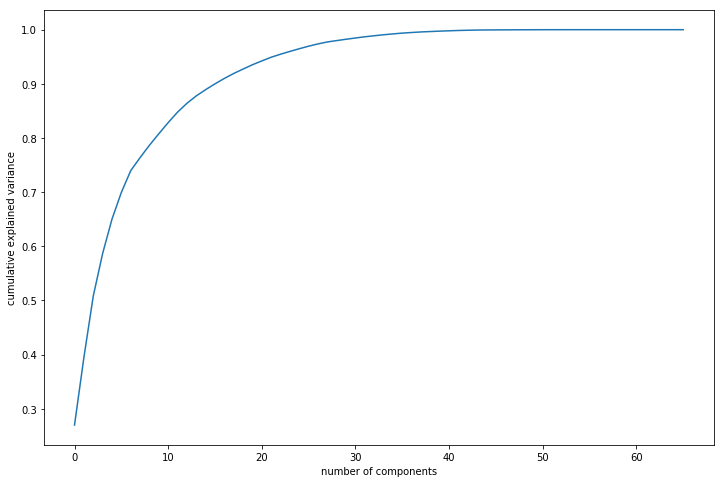

In [100]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 20 components are enough to describe 95% of the variance in the dataset
- We'll choose 20 components for our modeling

In [101]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

#### Basis transformation - getting the data onto our PCs

In [102]:
leads_train_pca = pca_final.fit_transform(X_train)
leads_train_pca.shape

(2639, 20)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [103]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(leads_train_pca.transpose())

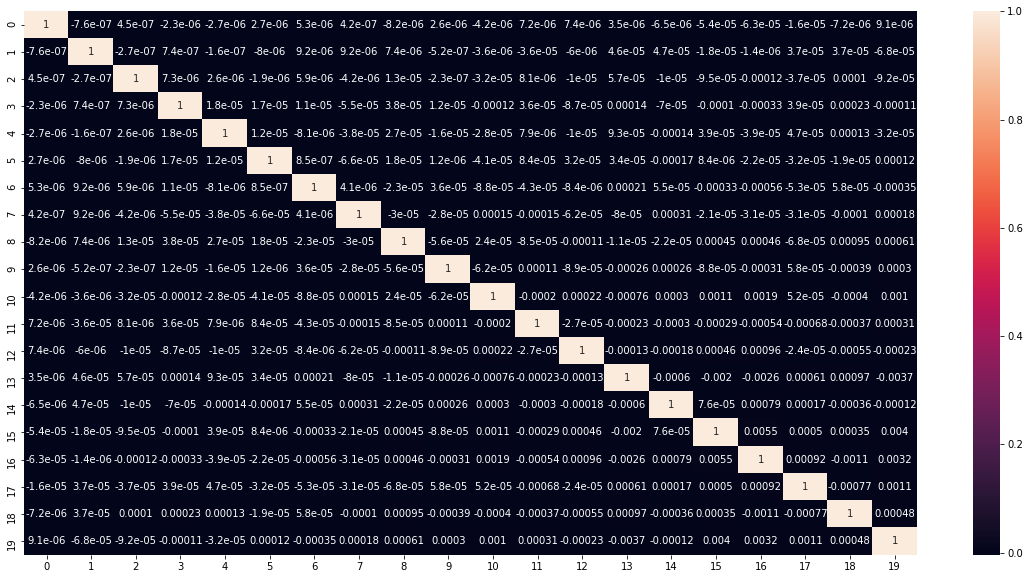

In [104]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [105]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00548821489726856 , min corr:  -0.0037064916686250556


There is very little correlation between the compnents

**Applying the PCA transformation on the Test Data**

In [106]:
leads_test_pca = pca_final.transform(X_test)
leads_test_pca.shape

(1131, 20)

In [107]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(leads_train_pca,y_train)

In [108]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(leads_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

We get an accuracy of 91% with PCA. However, it becomes tough to say which variables are playing a prominent role.<br>
Let us create another model using RFE to see which variables are the most important.

## Recursive Feature Elimination (RFE):

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [110]:
# Let us try running the model with only 15 variables.
rfe = RFE(logreg, 15)
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False  True False False False  True False False False False
 False False False False False False False False False False  True False
 False  True  True False False False False False  True  True  True False
 False False False False False False False False False False  True  True
  True  True  True False False False False False False False False False
 False False  True  True False False]
[45  3 31  1 11 27  8  1 12 20  4 22 47 41 34 21 44 51 33 40 37 36  1 32
 19  1  1 14 38 25 16  5  1  1  1  7  2 23 52 49 35 48  9 46 42 18  1  1
  1  1  1 50 17 10 30 15 39 43 29 26  6 13  1  1 28 24]


In [111]:
rfe_df = pd.DataFrame({'Feature':X.columns, 'Yes/No':rfe.support_, 'Ranking':rfe.ranking_})
rfe_df[rfe_df['Ranking']== 1]

,Feature,Yes/No,Ranking
3,Asymmetrique_Activity_Score,True,1
7,Lead Origin_Lead Add Form,True,1
22,Lead Source_Welingak Website,True,1
25,Last Activity_Converted to Lead,True,1
26,Last Activity_Email Bounced,True,1
32,Last Activity_Had a Phone Conversation,True,1
33,Last Activity_Olark Chat Conversation,True,1
34,Last Activity_Page Visited on Website,True,1
46,Tags_Lost,True,1
47,Tags_Not Eligible,True,1


In [112]:
# Below are the columns selected via RFE Method:

cols_rfe = ['Total_Time_Spent_on_Website',
'Asymmetrique_Activity_Score',
'Lead Origin_Lead Add Form',
'Lead Source_Welingak Website',
'Last Activity_Email Bounced',
'Last Activity_Form Submitted on Website',
'Last Activity_Had a Phone Conversation',
'Last Activity_SMS Sent',
'Last Activity_Unreachable',
'Tags_Lost',
'Tags_Not Eligible',
'Tags_Not Interested',
'Tags_Work in Progress',
'Asymmetrique Activity Index_02.Medium',
'Last Notable Activity_Modified']


**Assessing the model**

In [113]:
import statsmodels.api as sm

In [114]:
X_train_sm = sm.add_constant(X_train[cols_rfe])
logreg_rfe = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg_rfe.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2639
Model:                            GLM   Df Residuals:                     2623
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -941.83
Date:                Mon, 26 Aug 2019   Deviance:                       1883.7
Time:                        18:17:41   Pearson chi2:                 3.15e+03
No. Iterations:                    23   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.4278      0.243     -5.886      0.000      -1.903      -0.952
Total_Time_Spent_on_Website                 0.9926      0.062     15.890      0.000       0.870       1.115
Asymmetrique_Activity_Score                 1.4144      0.093     15.280      0.000       1.233       1.596
Lead Origin_Lead Add Form                   2.7289      0.304      8.981      0.000       2.133       3.324
Lead Source_Welingak Website               22.9604   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
Last Activity_Email Bounced                -1.6440      0.549     -2.992      0.003      -2.721      -0.567
Last Activity_Form Submitted on Website     2.2327      0.487      4.583      0.000       1.278       3.188
Last Activity_Had a Phone Conversation      3.1022      0.973      3.189      0.001       1.195       5.009
Last Activity_SMS Sent                      1.4872      0.139     10.668      0.000       1.214       1.760
Last Activity_Unreachable                   2.1045      0.593      3.551      0.000       0.943       3.266
Tags_Lost                                  -3.1030      0.489     -6.340      0.000      -4.062      -2.144
Tags_Not Eligible                          -1.9842      0.751     -2.642      0.008      -3.456      -0.512
Tags_Not Interested                        -3.0440      0.256    -11.901      0.000      -3.545      -2.543
Tags_Work in Progress                      -2.2839      0.153    -14.973      0.000      -2.583      -1.985
Asymmetrique Activity Index_02.Medium       1.9028      0.250      7.617      0.000       1.413       2.392
Last Notable Activity_Modified             -1.3033      0.125    -10.417      0.000      -1.549      -1.058
===========================================================================================================
"""

From the above summary we can see that the column **Lead Source_Welingak Website**is not significant at all since its p-value is 1.<br>
Let us drop this column.

Dropping the column **Lead Source_Welingak Website** and rerunning the model

In [115]:
# Dropping the column "Lead Source_Welingak Website"
cols_rfe.remove('Lead Source_Welingak Website')

In [116]:
# Running the model again:
X_train_sm = sm.add_constant(X_train[cols_rfe])
logreg_rfe = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg_rfe.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2639
Model:                            GLM   Df Residuals:                     2624
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -948.64
Date:                Mon, 26 Aug 2019   Deviance:                       1897.3
Time:                        18:17:42   Pearson chi2:                 3.09e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.4299      0.242     -5.916      0.000      -1.904      -0.956
Total_Time_Spent_on_Website                 0.9905      0.062     15.917      0.000       0.869       1.112
Asymmetrique_Activity_Score                 1.4101      0.092     15.318      0.000       1.230       1.591
Lead Origin_Lead Add Form                   3.1812      0.299     10.647      0.000       2.596       3.767
Last Activity_Email Bounced                -1.5411      0.519     -2.970      0.003      -2.558      -0.524
Last Activity_Form Submitted on Website     2.2257      0.487      4.571      0.000       1.271       3.180
Last Activity_Had a Phone Conversation      3.0920      0.966      3.201      0.001       1.199       4.985
Last Activity_SMS Sent                      1.4850      0.139     10.695      0.000       1.213       1.757
Last Activity_Unreachable                   2.1007      0.595      3.532      0.000       0.935       3.266
Tags_Lost                                  -3.1145      0.489     -6.373      0.000      -4.072      -2.157
Tags_Not Eligible                          -1.7553      0.684     -2.565      0.010      -3.096      -0.414
Tags_Not Interested                        -2.9621      0.247    -12.015      0.000      -3.445      -2.479
Tags_Work in Progress                      -2.2736      0.152    -14.971      0.000      -2.571      -1.976
Asymmetrique Activity Index_02.Medium       1.9017      0.249      7.645      0.000       1.414       2.389
Last Notable Activity_Modified             -1.3167      0.125    -10.535      0.000      -1.562      -1.072
===========================================================================================================
"""

It can be seen that **Tags_Not Eligible** also has a high p-value and therefore needs to be dropped.

In [117]:
cols_rfe.remove('Tags_Not Eligible')

In [118]:
# Running the model again:
X_train_sm = sm.add_constant(X_train[cols_rfe])
logreg_rfe = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg_rfe.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2639
Model:                            GLM   Df Residuals:                     2625
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -952.28
Date:                Mon, 26 Aug 2019   Deviance:                       1904.6
Time:                        18:17:42   Pearson chi2:                 3.08e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.4514      0.241     -6.019      0.000      -1.924      -0.979
Total_Time_Spent_on_Website                 0.9865      0.062     15.916      0.000       0.865       1.108
Asymmetrique_Activity_Score                 1.4129      0.092     15.352      0.000       1.233       1.593
Lead Origin_Lead Add Form                   3.1667      0.298     10.636      0.000       2.583       3.750
Last Activity_Email Bounced                -1.5263      0.518     -2.947      0.003      -2.542      -0.511
Last Activity_Form Submitted on Website     2.2381      0.486      4.603      0.000       1.285       3.191
Last Activity_Had a Phone Conversation      3.1063      0.963      3.224      0.001       1.218       4.995
Last Activity_SMS Sent                      1.4793      0.138     10.685      0.000       1.208       1.751
Last Activity_Unreachable                   2.1111      0.593      3.561      0.000       0.949       3.273
Tags_Lost                                  -3.0877      0.488     -6.326      0.000      -4.044      -2.131
Tags_Not Interested                        -2.9421      0.246    -11.955      0.000      -3.424      -2.460
Tags_Work in Progress                      -2.2501      0.151    -14.870      0.000      -2.547      -1.954
Asymmetrique Activity Index_02.Medium       1.9017      0.248      7.662      0.000       1.415       2.388
Last Notable Activity_Modified             -1.3113      0.125    -10.519      0.000      -1.556      -1.067
===========================================================================================================
"""

We can see that the p-values are almost 0 for all of the 13 variables in the model.<br>
However, we should also check the VIF of each of these columns to get the perfect model.
### Checking the VIF:

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_rfe].values, i) for i in range(X_train[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Asymmetrique Activity Index_02.Medium,2.89
12,Last Notable Activity_Modified,1.77
10,Tags_Work in Progress,1.49
6,Last Activity_SMS Sent,1.47
9,Tags_Not Interested,1.23
2,Lead Origin_Lead Add Form,1.21
1,Asymmetrique_Activity_Score,1.15
0,Total_Time_Spent_on_Website,1.11
3,Last Activity_Email Bounced,1.09
4,Last Activity_Form Submitted on Website,1.06


We can see that all the variables have a low VIF (below 3) and therefore these variables are good to go.<br>
Let us now move forward with the prediction of values on the train set.
## Prediction of values on the Train set:

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1299    0.078603
1445    0.035558
233     0.932027
2479    0.692462
1751    0.015379
2667    0.844949
1033    0.126599
3870    0.565723
3743    0.983801
2677    0.020098
dtype: float64

In [122]:
X_train_sm.shape

(2639, 14)

In [123]:
y_train_pred.shape

(2639,)

In [124]:
# Reshaping the values:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07860265, 0.0355582 , 0.93202674, 0.69246151, 0.01537898,
       0.84494907, 0.12659943, 0.56572336, 0.98380077, 0.02009832])

In [125]:
y_train_pred.shape

(2639,)

Let us now create a dataframe with the actual conversion (0/1) and the conversion probability.

In [126]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,0,0.078603,1299
1,0,0.035558,1445
2,0,0.932027,233
3,1,0.692462,2479
4,0,0.015379,1751


The next step would be to find the **Optimal value of the threshold value** so that we can classify the probabilities as Converted or not.<br>

In [127]:
# Creating columns with different cut-off values:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.078603,1299,1,0,0,0,0,0,0,0,0,0
1,0,0.035558,1445,1,0,0,0,0,0,0,0,0,0
2,0,0.932027,233,1,1,1,1,1,1,1,1,1,1
3,1,0.692462,2479,1,1,1,1,1,1,1,0,0,0
4,0,0.015379,1751,1,0,0,0,0,0,0,0,0,0


In [128]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.419856  1.000000  0.000000
0.1   0.1  0.707465  0.971119  0.516656
0.2   0.2  0.779462  0.934116  0.667538
0.3   0.3  0.807124  0.896209  0.742652
0.4   0.4  0.835923  0.838448  0.834095
0.5   0.5  0.846533  0.801444  0.879164
0.6   0.6  0.833649  0.739170  0.902025
0.7   0.7  0.807503  0.628159  0.937296
0.8   0.8  0.785525  0.537004  0.965382
0.9   0.9  0.729064  0.367329  0.990856


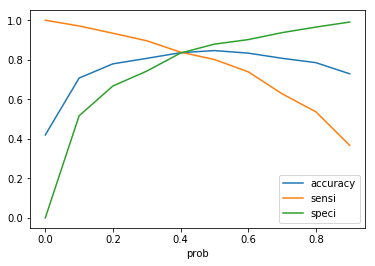

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
#plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])

plt.show()

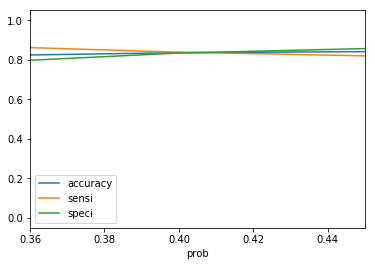

In [130]:
# Zooming in:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlim(0.36, 0.45)
plt.show()

We can see that the optimal cutoff is about 0.41 as accuracy, sensitivity and specificity meet at this point.
### Assigning values based on the optimal cut-off.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.078603,1299,1,0,0,0,0,0,0,0,0,0,0
1,0,0.035558,1445,1,0,0,0,0,0,0,0,0,0,0
2,0,0.932027,233,1,1,1,1,1,1,1,1,1,1,1
3,1,0.692462,2479,1,1,1,1,1,1,1,0,0,0,1
4,0,0.015379,1751,1,0,0,0,0,0,0,0,0,0,0


### Assigning Lead Score:

In [132]:
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Conversion_Prob']*100, 2)
Lead_Score_df = y_train_pred_final[['LeadID', 'Lead Score']]
Lead_Score_df.head()

,LeadID,Lead Score
0,1299,7.86
1,1445,3.56
2,233,93.20
3,2479,69.25
4,1751,1.54


For the purpose of this model, a Lead Score of equal to or greater than 41 means that the lead is likely to be converted.

### Measuring the accuracy of our model:

In [133]:
# Creating a Confusion Matrix:
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion

array([[1283,  248],
       [ 186,  922]])

In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Sensitivity:
TP / float(TP+FN)

0.8321299638989169

In [136]:
# Specificity
TN / float(TN+FP)

0.8380143696930111

In [137]:
# Accuracy:
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.8355437665782494

An accuracy score of 0.84 is pretty good which shows that our model is pretty good at classification.<br>
Sensitivity of 0.84 tells us that the model is able to correctly identify around 83% of the actual positives.<br>
Specificity of 0.83 tells us that the model is able to correctly identify around 83% of the actual negatives.

## Making predictions on the Test data:

In [138]:
X_test.head()

,Total_Visits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
794,-1.335685,-0.926992,-1.349793,1.895169,-0.787769,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1469,0.572437,1.497528,1.127636,-0.360486,0.870461,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4918,-0.381624,-0.566125,-0.111078,-1.488314,1.975948,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
779,1.526497,0.485649,0.508279,-1.488314,0.870461,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2267,0.095406,2.012535,0.508279,-0.360486,0.317717,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
X_test.shape

(1131, 66)

In [140]:
X_test_sm = sm.add_constant(X_test[cols_rfe])

In [141]:
X_test_sm.shape

(1131, 14)

In [142]:
y_test_pred = res.predict(X_test_sm)

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
y_pred_1.head()

,0
794,0.269057
1469,0.303252
4918,0.021468
779,0.236224
2267,0.967878


In [145]:
y_test_model.head()

,Prospect ID,Lead Number,Converted
794,090754e0-f007-4b16-845c-641ce1237585,651713,0
1469,cb88de9e-545d-4d99-9147-529842216f6f,644129,1
4918,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0
779,44cf6fee-4967-43ec-91b4-346f1108b46c,651866,0
2267,85ce3832-ea0d-4fd4-85ed-0435b50c9f45,637159,1


In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_model.reset_index(drop=True, inplace=True)

In [147]:
y_test_model.head()

,Prospect ID,Lead Number,Converted
0,090754e0-f007-4b16-845c-641ce1237585,651713,0
1,cb88de9e-545d-4d99-9147-529842216f6f,644129,1
2,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0
3,44cf6fee-4967-43ec-91b4-346f1108b46c,651866,0
4,85ce3832-ea0d-4fd4-85ed-0435b50c9f45,637159,1


In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_model, y_pred_1],axis=1)

In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob
0,090754e0-f007-4b16-845c-641ce1237585,651713,0,0.269057
1,cb88de9e-545d-4d99-9147-529842216f6f,644129,1,0.303252
2,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0,0.021468
3,44cf6fee-4967-43ec-91b4-346f1108b46c,651866,0,0.236224
4,85ce3832-ea0d-4fd4-85ed-0435b50c9f45,637159,1,0.967878


In [151]:
y_pred_final.shape

(1131, 4)

In [152]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.41 else 0)
# Let's see the head
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob,predicted
0,090754e0-f007-4b16-845c-641ce1237585,651713,0,0.269057,0
1,cb88de9e-545d-4d99-9147-529842216f6f,644129,1,0.303252,0
2,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,0,0.021468,0
3,44cf6fee-4967-43ec-91b4-346f1108b46c,651866,0,0.236224,0
4,85ce3832-ea0d-4fd4-85ed-0435b50c9f45,637159,1,0.967878,1


In [153]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted)
confusion

array([[568,  74],
       [ 82, 407]])

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Sensitivity:
TP / float(TP+FN)

0.8323108384458078

In [156]:
# Specificity
TN / float(TN+FP)

0.8847352024922118

In [157]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8620689655172413

An accuracy of 86% in classifying the data is pretty good on the test dataset.<br>
Sensitivity of 84% and a specificity of 87% means that our model is able to classify both the true positives and the true negatives correctly.

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

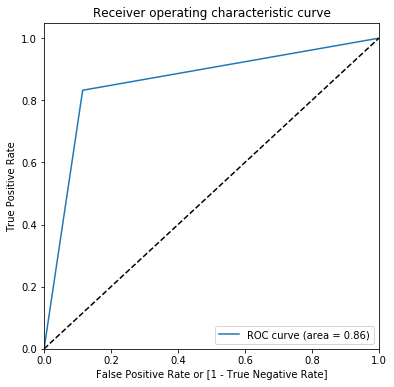

(array([0.       , 0.1152648, 1.       ]),
 array([0.        , 0.83231084, 1.        ]),
 array([2, 1, 0]))

In [159]:
draw_roc(y_pred_final.Converted,y_pred_final.predicted)